In [2]:
import pandas as pd
import geopandas as gp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
all_pz=pd.read_excel("../../data/piezos/liste_pz_60_65.xlsx",sheet_name=0)
all_pz

,N°Invent.,x,y,Côte margelle,Prof.Pz_étiage_1961,Pz_étiage_1961,AquifèreCapté,Date_piézo,Source
0,??,683358.931439,6.178225e+06,70.19,1.126667,69.063333,Pliocène profond,Moyenne FinJuinOct.Nov.1961,"Dazy,1961"
1,B10,694569.790049,6.181817e+06,13.85,1.463333,12.386667,Quaternaire,Moyenne FinJuinOct.Nov.1961,"Dazy,1961"
2,B12,694521.925045,6.182088e+06,13.96,1.890000,12.070000,Quaternaire,Moyenne FinJuinOct.Nov.1961,"Dazy,1961"
3,B14,694115.468654,6.181341e+06,16.60,3.360000,13.240000,Quaternaire,Moyenne FinJuinOct.Nov.1961,"Dazy,1961"
4,B15,684819.157323,6.178062e+06,16.46,2.476667,13.983333,Quaternaire,Moyenne FinJuinOct.Nov.1961,"Dazy,1961"
...,...,...,...,...,...,...,...,...,...
967,148,688595.956113,6.187041e+06,27.63,4.500000,23.130000,Quaternaire et Pliocène (continental),Moyenne Oct.Nov.1963,Gadel_1966
968,149,688299.331661,6.187494e+06,31.80,3.410000,28.390000,Quaternaire,Moyenne Oct.Nov.1963,Gadel_1966
969,145b,687604.775234,6.188250e+06,38.76,6.160000,32.600000,Quaternaire,Moyenne Oct.Nov.1963,Gadel_1966
970,47b,688394.143430,6.186843e+06,NaN,4.690000,NaN,Pliocène,Moyenne Oct.Nov.1963,Gadel_1966


In [33]:
lst_pz=all_pz.groupby(["x","y"]).aggregate({"Pz_étiage_1961":np.mean,
                                                                 "AquifèreCapté":min})
lst_pz.reset_index(inplace=True)
lst_pz.rename(columns={"x":"X","y":"Y","Pz_étiage_1961":"Head [m]"},inplace=True)

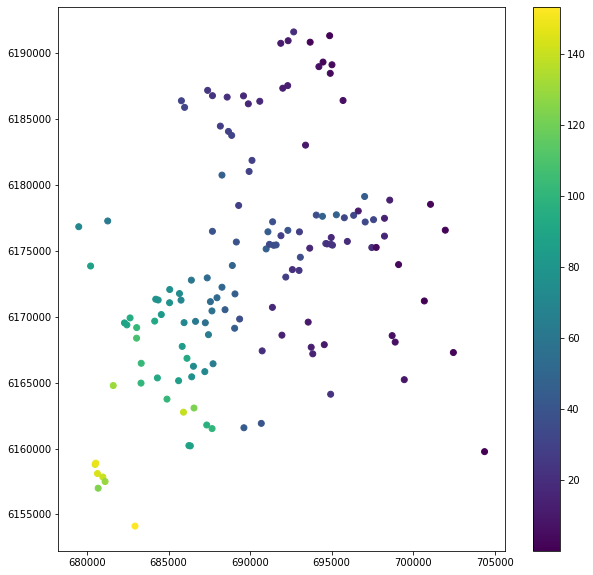

In [34]:
lst_pz = lst_pz[lst_pz["AquifèreCapté"] == "Pliocène"]


fig,ax=plt.subplots(figsize=(10,10))
plt.scatter(lst_pz.X,lst_pz.Y,c = lst_pz["Head [m]"])
plt.colorbar()

AquifèreCapté
Pliocène                                 AxesSubplot(0.125,0.125;0.775x0.755)
Pliocène Profond                         AxesSubplot(0.125,0.125;0.775x0.755)
Pliocène profond                         AxesSubplot(0.125,0.125;0.775x0.755)
Pliocène superficiel                     AxesSubplot(0.125,0.125;0.775x0.755)
Pliocène?                                AxesSubplot(0.125,0.125;0.775x0.755)
Quaternaire                              AxesSubplot(0.125,0.125;0.775x0.755)
Quaternaire et Pliocène (continental)    AxesSubplot(0.125,0.125;0.775x0.755)
Name: AquifèreCapté, dtype: object

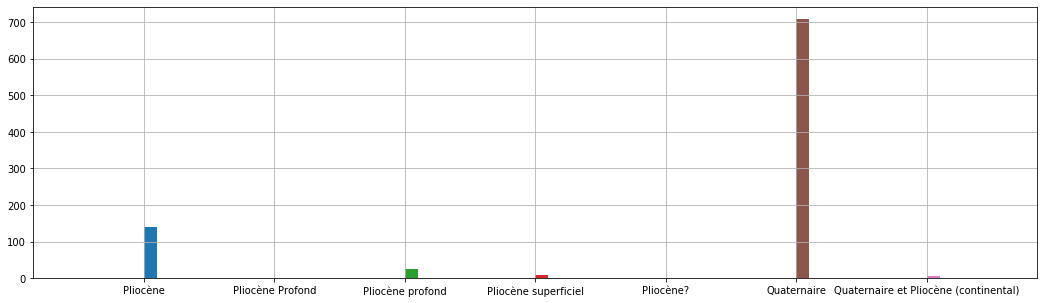

In [21]:
fig,ax=plt.subplots(figsize=(18,5))
lst_pz.AquifèreCapté.hist(ax=ax)

In [ ]:
sns.pairplot(all_pz,hue="AquifèreCapté")